In [58]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
# Loading the dataset

Job_postings = pd.read_csv('job_postings.csv')
Job_postings.head()

,Unnamed: 0,Job Posting ID,Job Posting Date,Job Title,Job Title Full,Job Title Additional Info,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size
0,0,2701524240,1/1/2017,Software Engineer,Software Engineer,Java Full Stack | Remote,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,NaN,NaN,NaN,6.0,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,2719108338,1/1/2017,Data Engineer,Senior Azure Data Engineer,NaN,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,NaN,NaN,NaN,1.0,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,2719503370,1/1/2017,Software Engineer,Software Engineer I,NaN,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,NaN,NaN,NaN,16.0,Paycor,Computer Software,"1,001-5,000 employees"
3,3,2734877741,1/1/2017,Business Analyst,Associate Business Analyst,Telecommute,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",NaN,NaN,NaN,1.0,Optum,Hospital & Health Care,"10,001+ employees"
4,4,2752415616,1/1/2017,Developer,Swift Developer,NaN,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",NaN,NaN,NaN,NaN,Toptal,Internet,"1,001-5,000 employees"


## Data Cleaning

In [60]:
# Checking the shape of the dataset

Job_postings.shape

(25114, 18)

In [61]:
# Checking the datatypes of the columns

Job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25114 entries, 0 to 25113
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 25114 non-null  int64  
 1   Job Posting ID             25114 non-null  int64  
 2   Job Posting Date           25114 non-null  object 
 3   Job Title                  25114 non-null  object 
 4   Job Title Full             25114 non-null  object 
 5   Job Title Additional Info  8187 non-null   object 
 6   Job Position Type          25114 non-null  object 
 7   Job Position Level         25114 non-null  object 
 8   Years of Experience        25114 non-null  int64  
 9   Job Skills                 25114 non-null  object 
 10  Job Location               25114 non-null  object 
 11  Minimum Pay                1812 non-null   float64
 12  Maximum Pay                1812 non-null   float64
 13  Pay Rate                   1812 non-null   obj

In [62]:
# Converting Job Posting Date to datetime format

Job_postings['Job Posting Date'] = pd.to_datetime(Job_postings['Job Posting Date'])

In [63]:
Job_postings.dtypes

Unnamed: 0                            int64
Job Posting ID                        int64
Job Posting Date             datetime64[ns]
Job Title                            object
Job Title Full                       object
Job Title Additional Info            object
Job Position Type                    object
Job Position Level                   object
Years of Experience                   int64
Job Skills                           object
Job Location                         object
Minimum Pay                         float64
Maximum Pay                         float64
Pay Rate                             object
Number of Applicants                float64
Company Name                         object
Company Industry                     object
Company Size                         object
dtype: object

In [64]:
# Missing values

Job_postings.isnull().sum()

Unnamed: 0                       0
Job Posting ID                   0
Job Posting Date                 0
Job Title                        0
Job Title Full                   0
Job Title Additional Info    16927
Job Position Type                0
Job Position Level               0
Years of Experience              0
Job Skills                       0
Job Location                     0
Minimum Pay                  23302
Maximum Pay                  23302
Pay Rate                     23302
Number of Applicants          7585
Company Name                    61
Company Industry               219
Company Size                   222
dtype: int64

In [65]:
# Filter the dataset to include relevant job titles
relevant_job_titles = ["Data Analyst", "Data Engineer", "Data Scientist", "Machine Learning Engineer", "Data Science Manager"]

Job_postings = Job_postings[Job_postings['Job Title'].isin(relevant_job_titles)]

Job_postings['Job Title'].value_counts()

Data Engineer                3462
Data Scientist               1999
Data Analyst                 1485
Machine Learning Engineer     283
Data Science Manager           23
Name: Job Title, dtype: int64

#### Job Postings

In [66]:
# Counts of the different job titles compared to each other

Job_postings_count = Job_postings['Job Title'].value_counts().reset_index()
Job_postings_count.columns = ['Job Title', 'Count']

fig = px.bar(
    Job_postings_count, 
    y='Job Title', 
    x='Count', 
    title='Count of Job Postings by Job Title', 
    color = 'Job Title',
    orientation='h', 
    labels={'Job Title': 'Job Title', 'Count': 'Count'},
    text='Count'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}, 
    xaxis_title='Count',
    yaxis_title='Job Title',
    width = 1000,
    height = 600
)

fig.show()

The top advertised roles were for Data Engineers, followed by Data Scientists. Data Science Manager had the least advertised roles. 

In [67]:
# Trend of job postings over time (by date)

# Create a new column for the year of the job posting
Job_postings['Year'] = Job_postings['Job Posting Date'].dt.year

# Group data by year to analyze the trend of job postings over time
Job_postings_trend = Job_postings.groupby('Year')['Job Posting ID'].count().reset_index()

fig = px.line(
    Job_postings_trend,
    x='Year',
    y='Job Posting ID',
    title='Trend of Job Postings by Year',
    labels={'Year': 'Year', 'Job Posting ID': 'Count'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count',
    width = 1000,
    height = 600
)

fig.show()

Job postings for these data careers have been growing over time. 

In [68]:
# Number of job postings for each 'Job Position Level' across different job titles

# Group by 'Job Position Level' and 'Job Title' and count the number of postings
Job_postings_grouped = Job_postings.groupby(['Job Position Level', 'Job Title']).size().reset_index(name='Count')

fig = px.bar(
    Job_postings_grouped,
    x='Job Position Level',
    y='Count',
    color='Job Title',
    title='Number of Job Postings for Each Job Position Level Across Different Job Titles',
    labels={'Job Position Level': 'Job Position Level', 'Job Title': 'Job Title', 'Count': 'Number of Job Postings'},
    text='Count',
)

fig.update_layout(
    xaxis_title='Job Position Level',
    yaxis_title='Number of Job Postings',
    width=1000,
    height=600
)

fig.show()

Mid-senior job position level has the most job postings followed by associate, then entry level. 

Top senior positions such as Director, Executives have the least advertised positions. 

Interestingly, the advertised positions for Internship were also low.

In [69]:
# Create an average pay column
Job_postings['Average Pay'] = (Job_postings['Minimum Pay'] + Job_postings['Maximum Pay'])/2

# Average pay by job title and Years of Experience
average_pay_per_experience = Job_postings.groupby('Job Title')['Average Pay'].mean().reset_index()

# Average pay by job title and Years of Experience
fig = px.scatter(average_pay_per_experience, 
             x='Job Title', 
             y='Average Pay', 
             color='Job Title', 
             title='Average Pay by Job Title',
                labels={'Job Title': 'Job Title', 'Average Pay': 'Average Pay'}
             )

fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Average Pay",
    legend_title="Job Title",
    width=1000,
    height=600
)

fig.show()

Data Science Managers are the top paid data professionals, as they receive more than 170K annually. They are followed closely by Machine Learning Engineers. Data Analysts are the least paid in the five-focused data professions.

In [70]:
# Average pay versus years of experience by job title

fig = px.scatter(Job_postings,
                    x='Years of Experience',
                    y='Average Pay',
                    color='Job Title',
                    marginal_y='violin',
                    marginal_x='box',
                    title='Average Pay versus Years of Experience by Job Title',
                    labels={'Years of Experience': 'Years of Experience', 'Average Pay': 'Average Pay', 'Job Title': 'Job Title'}
                )

fig.update_layout(
    xaxis_title="Years of Experience",
    yaxis_title="Average Pay",
    legend_title="Job Title",
    width=1000,
    height=600
)

fig.show()

Data Engineers, Machine Learning Engineers, and Data Scientists are paid a higher salary. As the years of experience increase, so does the pay.

In [71]:
# Calculate the average pay for each 'Job Position Level' across different job titles
avg_pay_df = Job_postings.groupby(['Job Title', 'Job Position Level'])['Average Pay'].mean().reset_index()

# Sort the data frame by 'Average Pay' in descending order
avg_pay_df = avg_pay_df.sort_values('Average Pay', ascending=False)

# Create a grouped bar chart
fig = px.bar(avg_pay_df, 
             x='Job Position Level', 
             y='Average Pay', 
             color='Job Title', 
             barmode='group',
             facet_col='Job Title',
             title='Average Pay for Each Job Position Level Across Different Job Titles',
             labels={'Job Position Level': 'Job Position Level', 'Average Pay': 'Average Pay'})

# Update layout
fig.update_layout(
    xaxis_title="Job Position Level",
    yaxis_title="Average Pay",
    legend_title="Job Title",
    width=1500,
    height=600
)

fig.show()



The pay is higher for those at the executive level, and is lower for those at the entry levels.

In [72]:
# Duplicate the main dataset

Job_postings2 = Job_postings.copy()

# Retain only the relevant columns

Job_postings2 = Job_postings2[['Job Posting ID', 'Job Skills']]

# Clean the 'Job Skills' column to remove unwanted characters
# and split it by comma delimiter to create a row for each skill along with the associated Job Posting ID
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('[', '')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace(']', '')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace("'", "")
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace(' ', '')

# Split the 'Job Skills' column by comma and create a new row for each skill
Job_postings2 = Job_postings2.dropna(subset=['Job Skills'])
Job_postings2 = Job_postings2.assign(**{'Job Skills':Job_postings2['Job Skills'].str.split(',')}).explode('Job Skills')

# Remove rows with a blank 'Job Skills' column
Job_postings2 = Job_postings2[Job_postings2['Job Skills'].str.strip() != '']

# Display the first 5 rows of the dataset
Job_postings2.head()

C:\Users\Pius\AppData\Local\Temp\ipykernel_16140\928925891.py:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Pius\AppData\Local\Temp\ipykernel_16140\928925891.py:12: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Job Posting ID,Job Skills
1,2719108338,data_lake
1,2719108338,cloud
1,2719108338,python
1,2719108338,spark
1,2719108338,github


In [73]:
# Checking the job skills column

Job_postings2['Job Skills'].unique()

array(['data_lake', 'cloud', 'python', 'spark', 'github', 'warehousing',
       't-sql', 'ci/cd', 'sql', 'apache', 'azure', 'scala', 'coding',
       'data_lakes', 'hadoop', 'devops', 'iot', 'aws', 'pyspark',
       'redshift', 'etl', 'nosql', 'machine_learning', 'database', 'ibm',
       'oracle', 'microsoft', 'programming', 'postgresql', 'linux', 'go',
       'power_bi', 'gcp', 'sap', 'bi', 'saas', 'tableau', 'atlassian',
       'powerbi', 'excel', 'r', 'ai', 'back-end', 'java', 'javascript',
       'mysql', 'git', 'scrum', 'airflow', 'agile', 'mongo', 'cognos',
       'dax', 'sas', 'jira', 'snowflake', 'agile/scrum', 'spss',
       'codebase', 'ml', 'pytorch', 'tensorflow', 'mlops', 'server',
       'pandas', 'slack', 'twilio', 'ai/ml', 'ruby', 'node.js', 'looker',
       'redis', 'postgres', 'macros', 'vba', 'docker', 'c', 'bash',
       'alteryx', 'word', 'perl', 'shell', 'json', 'kanban', 'bitbucket',
       'powerpoint', 'rust', 'kotlin', 'mongodb', 'css', 'html', 'rshiny',
    

In [74]:
# Replacing "power_bi" with "powerbi"

Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('power_bi', 'powerbi')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('ml', 'machine_learning')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('data_lakes', 'data_lake')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('ai/ml', 'ai')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('back-end', 'backend')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('agile/scrum', 'agile')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('scrum', 'agile')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('scrum/agile', 'agile')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('postgres', 'postgresql')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('linux/unix', 'linux')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('unix', 'linux')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('unix/linux', 'linux')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('cicd', 'ci/cd')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('javascript/typescript', 'javascript')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('js', 'javascript')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('c++', 'c/c++')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('c', 'c/c++')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('powerpoints', 'powerpoint')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('spreadsheets', 'spreadsheet')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('no-sql', 'nosql')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('frontend', 'fullstack')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('vue', 'vue.js')

C:\Users\Pius\AppData\Local\Temp\ipykernel_16140\3736021599.py:18: FutureWarning:

The default value of regex will change from True to False in a future version.



In [75]:
# Top 10 most demanded skills in the job market
skills_distribution = Job_postings2['Job Skills'].value_counts().reset_index()
skills_distribution.columns = ['Job Skills', 'Count']

# Get the top 10 most demanded skills
top_10_skills = skills_distribution.head(10)

# Plot the distribution of the top 10 most demanded skills
fig = px.bar(
    top_10_skills,
    x='Job Skills',
    y='Count',
    color='Job Skills',
    title='Top 10 Most Demanded Skills in the Job Market',
    labels={'Job Skills': 'Job Skills', 'Count': 'Count'}
)

fig.update_layout(
    xaxis_title='Job Skills',
    yaxis_title='Count',
    width=1000,
    height=600
)

fig.show()

Python, a programming language is the top demanded skill across the five professions in data. It is followed closely by SQL, then cloud. 

In [76]:
# Skill Likelihood Analysis

# Merge job_skills_data with job_postings to get the Job Title for each skill
skills_with_job_title = Job_postings2.merge(Job_postings[['Job Posting ID', 'Job Title']], on='Job Posting ID', how='inner')

# Number of times each skill appears in job postings for each job title
skill_appearance_count = skills_with_job_title.groupby(['Job Title', 'Job Skills'])['Job Posting ID'].count().reset_index()
skill_appearance_count.columns = ['Job Title', 'Job Skills', 'Appearance Count']

# Total number of job postings for each job title
total_job_postings_by_title = Job_postings['Job Title'].value_counts().reset_index()
total_job_postings_by_title.columns = ['Job Title', 'Total Job Postings']

# Merge the dataframes to calculate the likelihood of each skill appearing in a job posting for each job title
skill_likelihood = skill_appearance_count.merge(total_job_postings_by_title, on='Job Title', how='inner')
skill_likelihood['Likelihood (%)'] = (skill_likelihood['Appearance Count'] / skill_likelihood['Total Job Postings']) * 100

# Display the first few rows of the skill likelihood dataframe
skill_likelihood.head()


,Job Title,Job Skills,Appearance Count,Total Job Postings,Likelihood (%)
0,Data Analyst,agile,214,1485,14.410774
1,Data Analyst,agile/agile,1,1485,0.067340
2,Data Analyst,ai,61,1485,4.107744
3,Data Analyst,ai/mac/c++/c/c++++hine_learning,3,1485,0.202020
4,Data Analyst,airflow,39,1485,2.626263


In [77]:
# Function to get top 5 skills for each job title
def get_top_5_skills(job_title):
    return skill_likelihood[skill_likelihood['Job Title'] == job_title].nlargest(5, 'Likelihood (%)')

# Get unique job titles
job_titles = skill_likelihood['Job Title'].unique()

# Get top 5 skills for each job title
top_5_skills_per_title = pd.concat([get_top_5_skills(job_title) for job_title in job_titles])

# Sort the data in descending order for visualization
top_5_skills_per_title.sort_values(by='Likelihood (%)', ascending=False, inplace=True)

# Create a bar plot to visualize the top 5 skill likelihoods for each job title in separate subplots
fig = px.bar(top_5_skills_per_title, 
             x='Job Skills', 
             y='Likelihood (%)', 
             color='Job Title', 
             facet_col='Job Title', # Creating subplots based on 'Job Title'
             title='Top 5 Skill Likelihood Analysis by Job Title',
             labels={'Job Skills': 'Job Skills', 'Likelihood (%)': 'Likelihood (%)'})

# Update layout
fig.update_layout(
    xaxis_title="Job Skills",
    yaxis_title="Likelihood (%)",
    legend_title="Job Title",
    width=1300,
    height=800
)

fig.show()

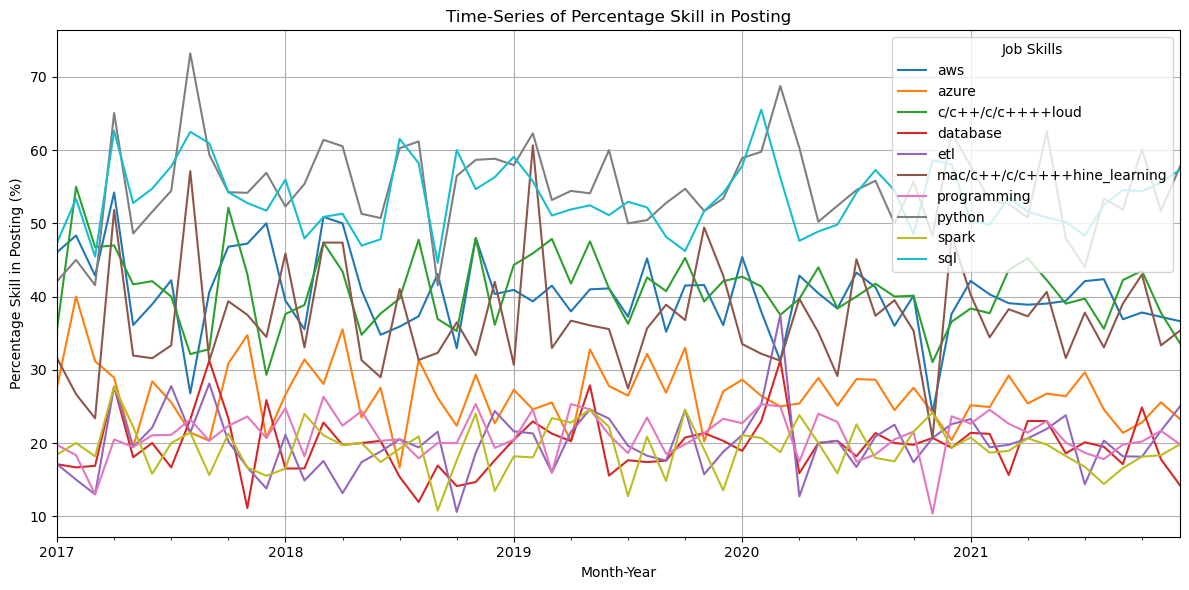

In [78]:
# Time-Series Analysis of Skill Mention in Job Postings

# Create a new column for the month-year of the job posting
Job_postings['Month-Year'] = Job_postings['Job Posting Date'].dt.to_period('M')

# Merge job_skills_data with job_postings to get the Month-Year and Job Title for each skill
skills_with_time = Job_postings2.merge(Job_postings[['Job Posting ID', 'Month-Year']], on='Job Posting ID', how='inner')

# Calculate the number of times each skill appears in job postings for each month-year
skill_appearance_count_time = skills_with_time.groupby(['Month-Year', 'Job Skills'])['Job Posting ID'].count().reset_index()
skill_appearance_count_time.columns = ['Month-Year', 'Job Skills', 'Appearance Count']

# Calculate the total number of job postings for each month-year
total_job_postings_by_time = Job_postings.groupby('Month-Year')['Job Posting ID'].count().reset_index()
total_job_postings_by_time.columns = ['Month-Year', 'Total Job Postings']

# Merge the dataframes to calculate the percentage of job postings mentioning each skill over time
skill_percentage_time = skill_appearance_count_time.merge(total_job_postings_by_time, on='Month-Year', how='inner')
skill_percentage_time['Percentage (%)'] = (skill_percentage_time['Appearance Count'] / skill_percentage_time['Total Job Postings']) * 100

# Get the top 10 skills by overall percentage mention
top_10_skills_overall = skill_percentage_time.groupby('Job Skills')['Percentage (%)'].mean().reset_index().nlargest(10, 'Percentage (%)')['Job Skills']

# Filter the data to only include the top 10 skills
top_10_skill_percentage_time = skill_percentage_time[skill_percentage_time['Job Skills'].isin(top_10_skills_overall)]

# Pivot the data for time-series plotting
top_10_skill_percentage_time_pivot = top_10_skill_percentage_time.pivot_table(index='Month-Year', columns='Job Skills', values='Percentage (%)', fill_value=0)

# Plot the time-series graph
top_10_skill_percentage_time_pivot.plot(figsize=(12, 6))
plt.ylabel('Percentage Skill in Posting (%)')
plt.title('Time-Series of Percentage Skill in Posting')
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
# Average years of experience by company industry

# Group data by Company Industry and Job Position Level to calculate the average years of experience
avg_experience_by_industry = Job_postings.groupby(['Company Industry', 'Job Position Level'])['Years of Experience'].mean().reset_index()

# Calculate the total number of job postings by Company Industry
posting_count_by_industry = Job_postings.groupby('Company Industry')['Job Posting ID'].count().reset_index()
posting_count_by_industry.columns = ['Company Industry', 'Posting Count']

# Merge the dataframes to include the posting count in the visualization
avg_experience_by_industry = avg_experience_by_industry.merge(posting_count_by_industry, on='Company Industry', how='inner')

# Get the top 10 industries by number of job postings
top_10_industries = posting_count_by_industry.nlargest(10, 'Posting Count')['Company Industry']

# Filter the data to include only the top 10 industries by number of job postings
avg_experience_by_industry_top_10 = avg_experience_by_industry[avg_experience_by_industry['Company Industry'].isin(top_10_industries)]

# Display the first few rows of the dataframe
avg_experience_by_industry_top_10.head()

,Company Industry,Job Position Level,Years of Experience,Posting Count
31,Computer Software,Associate,3.771536,782
32,Computer Software,Director,9.500000,782
33,Computer Software,Entry level,1.793651,782
34,Computer Software,Mid-Senior level,5.391304,782
70,Financial Services,Associate,3.676471,309


In [80]:
# Average years of experience by company industry

fig = px.scatter(
    avg_experience_by_industry_top_10,
    x = 'Years of Experience',
    y = 'Company Industry',
    color='Job Position Level',
    size='Posting Count',
    title='Average Years of Experience by Company Industry and Job Position Level by Job Posting Count',
    labels={'Years of Experience': 'Average Years of Experience', 'Company Industry': 'Company Industry', 'Job Position Level': 'Job Position Level', 'Posting Count': 'Posting Count'}
)

fig.update_layout(
    xaxis_title='Average Years of Experience',
    yaxis_title='Company Industry',
    legend_title='Job Position Level',
    width=1000,
    height=600
)

fig.show()

The Internet Industry has a consistent hiring across all Job Position Levels. Other industries such as Marketing & Advertising, Management Consulting, Insurance, and Health, Wellness & Fitness have relatively low hiring rates.

In [81]:
# Average pay by company industry

# Group data by Company Industry and Job Position Level to calculate the average pay
avg_pay_by_industry = Job_postings.groupby(['Company Industry', 'Job Position Level'])['Average Pay'].mean().reset_index()

fig = px.scatter(
    avg_pay_by_industry,
    x='Company Industry',
    y='Average Pay',
    color='Job Position Level',
    title='Average Pay by Company Industry and Job Position Level',
    labels={'Company Industry': 'Company Industry', 'Average Pay': 'Average Pay', 'Job Position Level': 'Job Position Level'}
)

fig.update_layout(
    xaxis_title='Company Industry',
    yaxis_title='Average Pay',
    legend_title='Job Position Level',
    width=1000,
    height=600
)

fig.show()

In [82]:
# Average pay by company industry and Job title

# Group data by Company Industry and Job Title to calculate the average pay
avg_pay_by_industry_title = Job_postings.groupby(['Company Industry', 'Job Title'])['Average Pay'].mean().reset_index()

fig = px.scatter(
    avg_pay_by_industry_title,
    x='Company Industry',
    y='Average Pay',
    color='Job Title',
    title='Average Pay by Company Industry and Job Title',
    labels={'Company Industry': 'Company Industry', 'Average Pay': 'Average Pay', 'Job Title': 'Job Title'}
)

fig.update_layout(
    xaxis_title='Company Industry',
    yaxis_title='Average Pay',
    legend_title='Job Title',
    width=1000,
    height=600
)

fig.show()

In [83]:
# Dropping "United States" from the job location column
Job_postings = Job_postings[Job_postings['Job Location'] != 'United States']

# Group data by Job Location and Job Title to calculate the number of job postings
job_postings_by_location = Job_postings.groupby(['Job Location', 'Job Title'])['Job Posting ID'].count().reset_index()
job_postings_by_location.columns = ['Job Location', 'Job Title', 'Job Posting Count']

# Get the top 10 job locations by number of job postings
top_10_locations = job_postings_by_location.groupby('Job Location')['Job Posting Count'].sum().reset_index().nlargest(10, 'Job Posting Count')['Job Location']

# Filter the data to include only the top 10 job locations by number of job postings descending order
job_postings_by_location_top_10 = job_postings_by_location[job_postings_by_location['Job Location'].isin(top_10_locations)]
job_postings_by_location_top_10 = job_postings_by_location_top_10.sort_values('Job Posting Count', ascending=False)

fig = px.bar(
    job_postings_by_location_top_10,
    x='Job Location',
    y='Job Posting Count',
    color='Job Title',
    title='Job Postings by Job Location and Job Title',
    labels={'Job Location': 'Job Location', 'Job Posting Count': 'Job Posting Count', 'Job Title': 'Job Title'}
)

fig.update_layout(
    xaxis_title='Job Location',
    yaxis_title='Job Posting Count',
    legend_title='Job Title',
    width=1000,
    height=600
)

fig.show()